# WASP-12

In [1]:
import lightkurve as lk
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = 'WASP-12'

In [3]:
clc = lk.search_lightcurve(name, mission='TESS', author='SPOC').download()
clc = clc.remove_nans()

fnames = np.asarray(glob(f'/Users/ch/HST/data/{name}/*.fits'))
obs = om.Observation.from_files(fnames)

In [4]:
obs.fit_transit(x_suppl=clc.time.value + 2457000,
                y_suppl=clc.flux.value/np.median(clc.flux.value),
                yerr_suppl=clc.flux_err.value/np.median(clc.flux.value),
                exptime_suppl=np.median(np.diff(clc.time.value)))

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

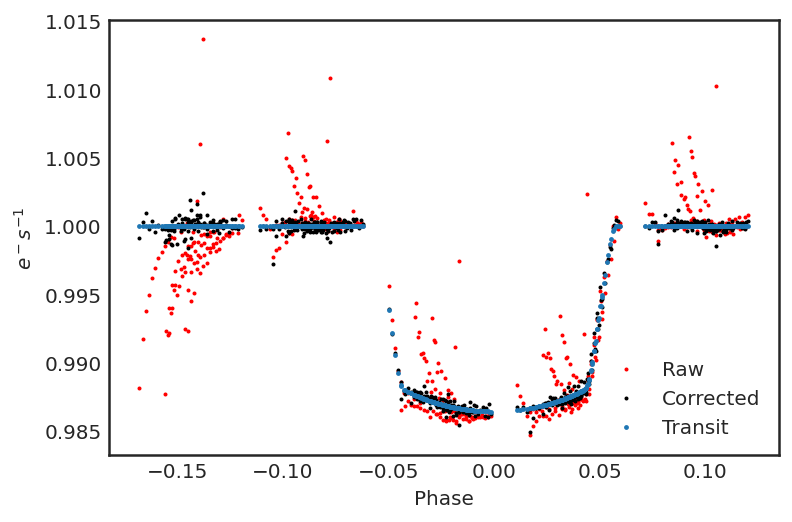

In [5]:
obs.plot()

In [6]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/12 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:   8%|▊         | 1/12 [00:06<01:13,  6.71s/it]

Fitting Transit/Eclipse Model:  17%|█▋        | 2/12 [00:13<01:06,  6.61s/it]

Fitting Transit/Eclipse Model:  25%|██▌       | 3/12 [00:20<01:02,  6.99s/it]

Fitting Transit/Eclipse Model:  33%|███▎      | 4/12 [00:27<00:56,  7.02s/it]

Fitting Transit/Eclipse Model:  42%|████▏     | 5/12 [00:33<00:46,  6.63s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 6/12 [00:39<00:37,  6.32s/it]

Fitting Transit/Eclipse Model:  58%|█████▊    | 7/12 [00:45<00:31,  6.25s/it]

Fitting Transit/Eclipse Model:  67%|██████▋   | 8/12 [00:51<00:24,  6.20s/it]

Fitting Transit/Eclipse Model:  75%|███████▌  | 9/12 [00:58<00:19,  6.34s/it]

Fitting Transit/Eclipse Model:  83%|████████▎ | 10/12 [01:04<00:12,  6.43s/it]

Fitting Transit/Eclipse Model:  92%|█████████▏| 11/12 [01:10<00:06,  6.16s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 12/12 [01:16<00:00,  6.07s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 12/12 [01:16<00:00,  6.36s/it]

<AxesSubplot:title={'center':'WASP-12 Transmission Spectrum, Visit: 6'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

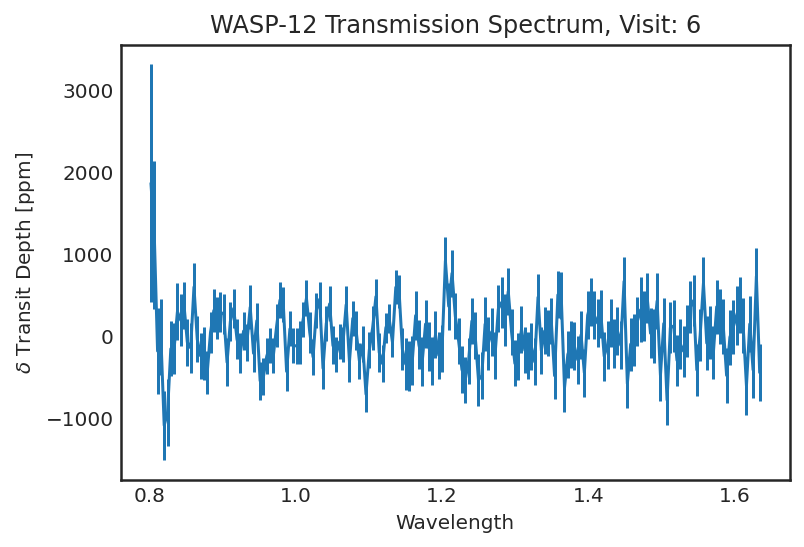

In [7]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

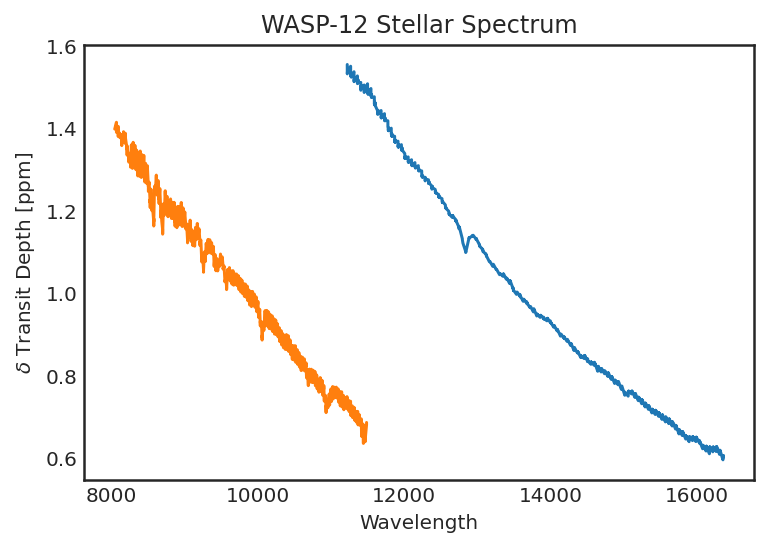

In [8]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [9]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

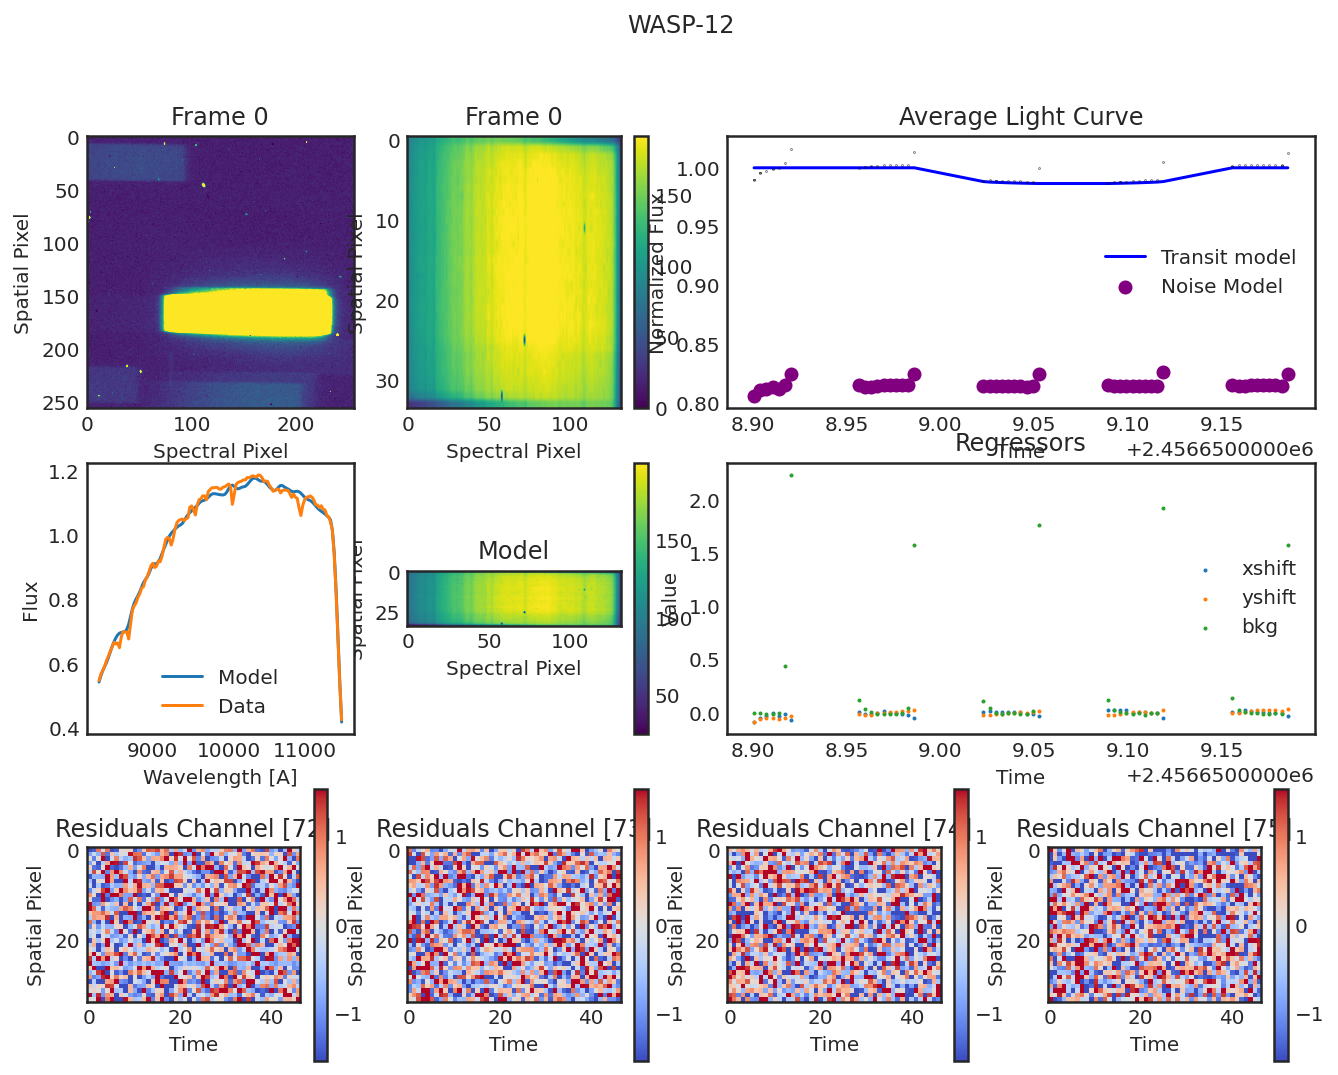

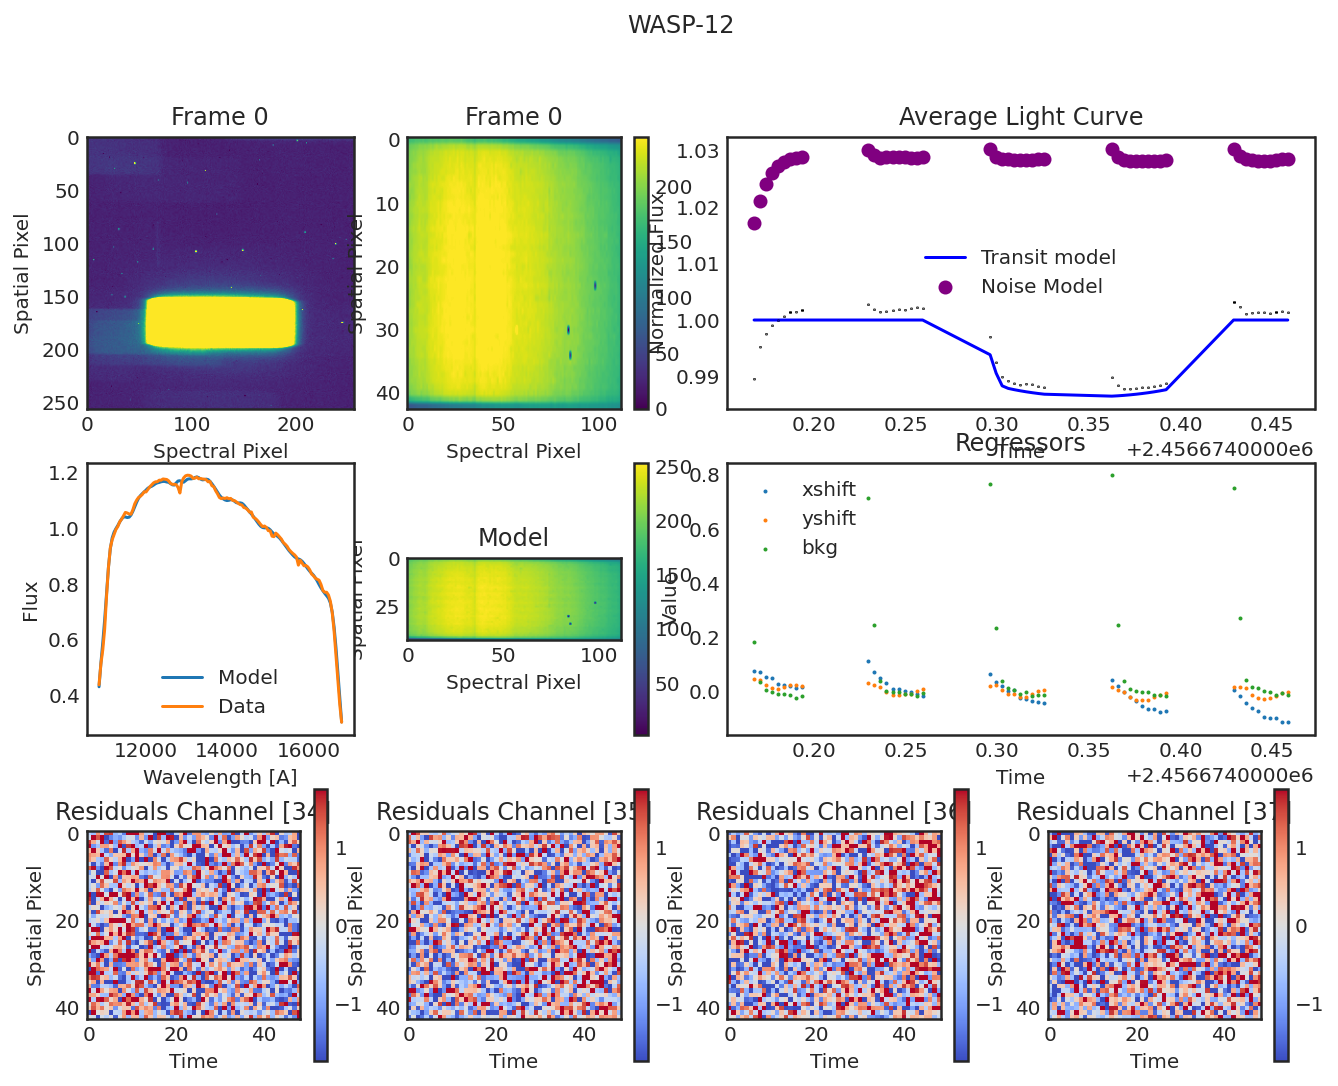

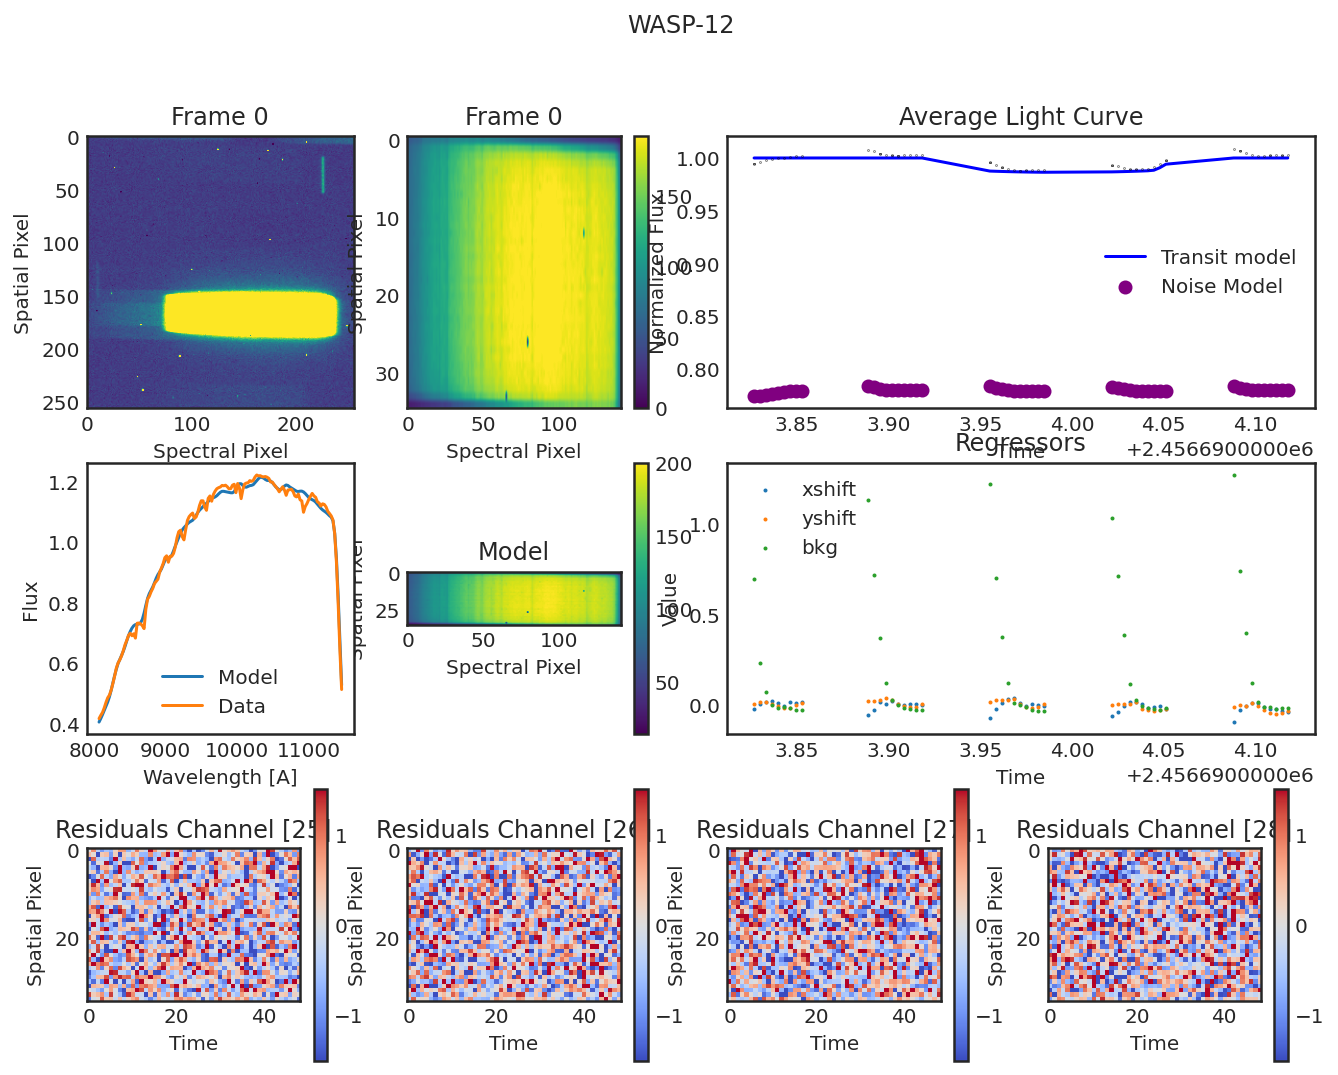

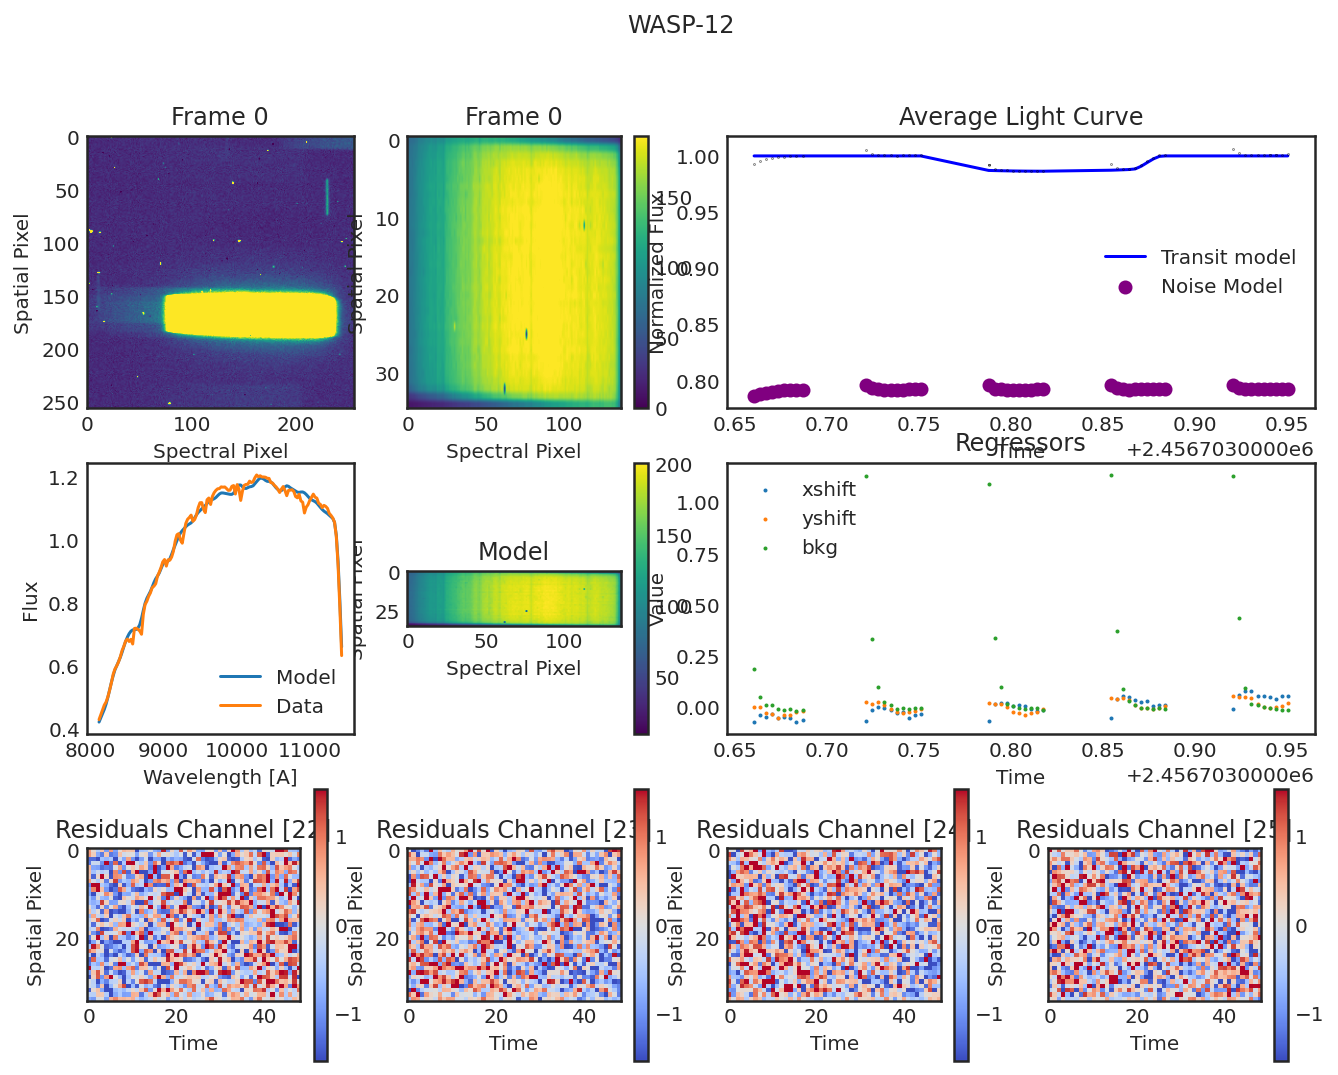

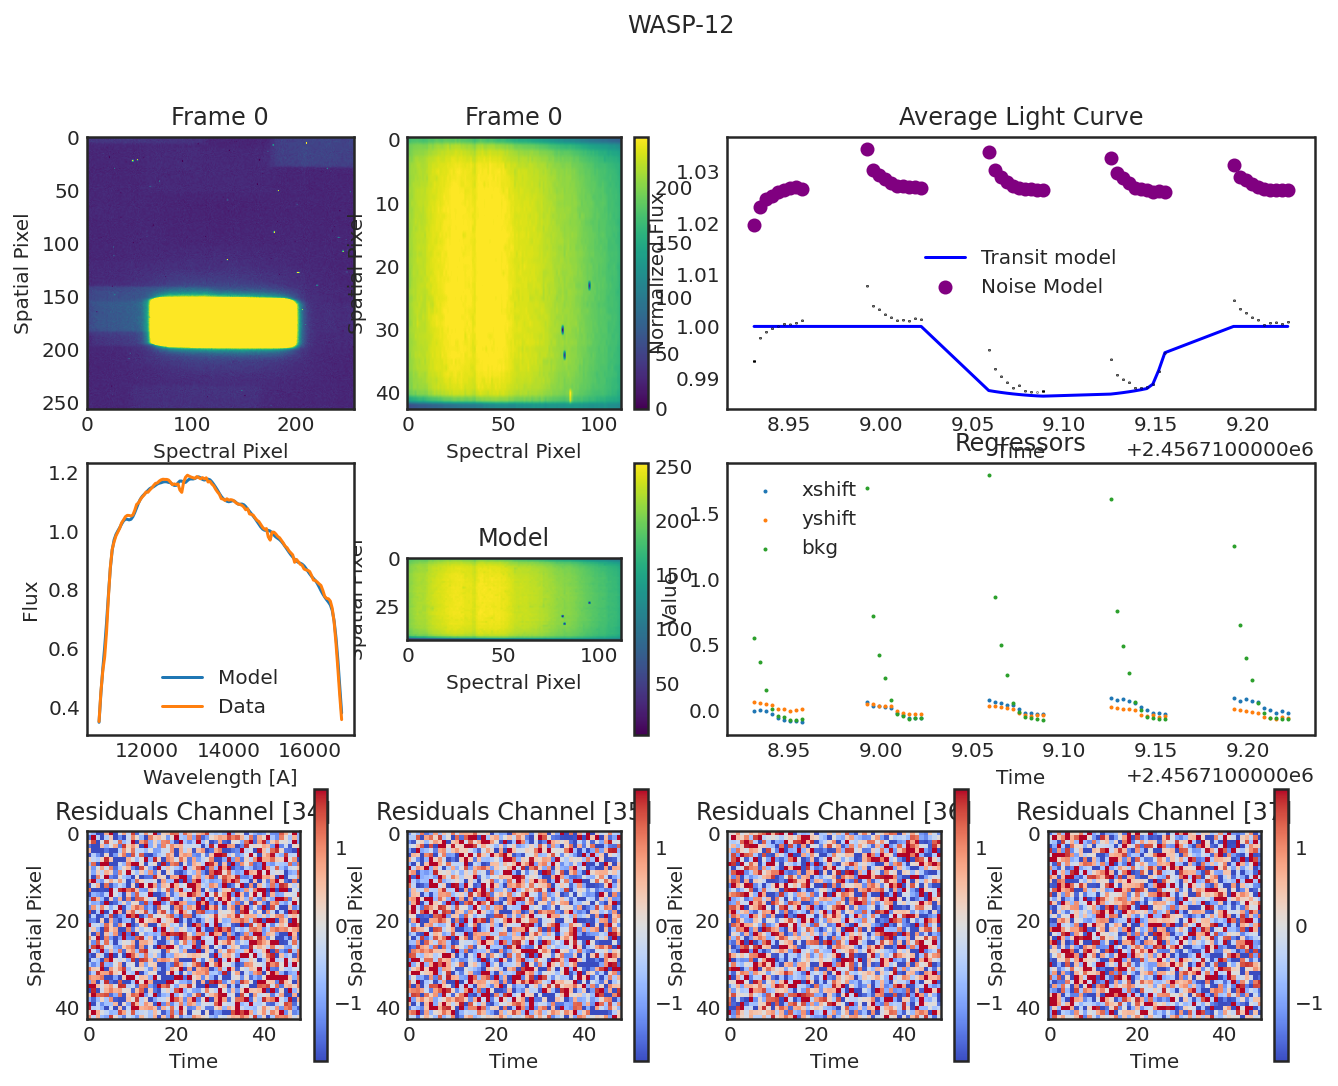

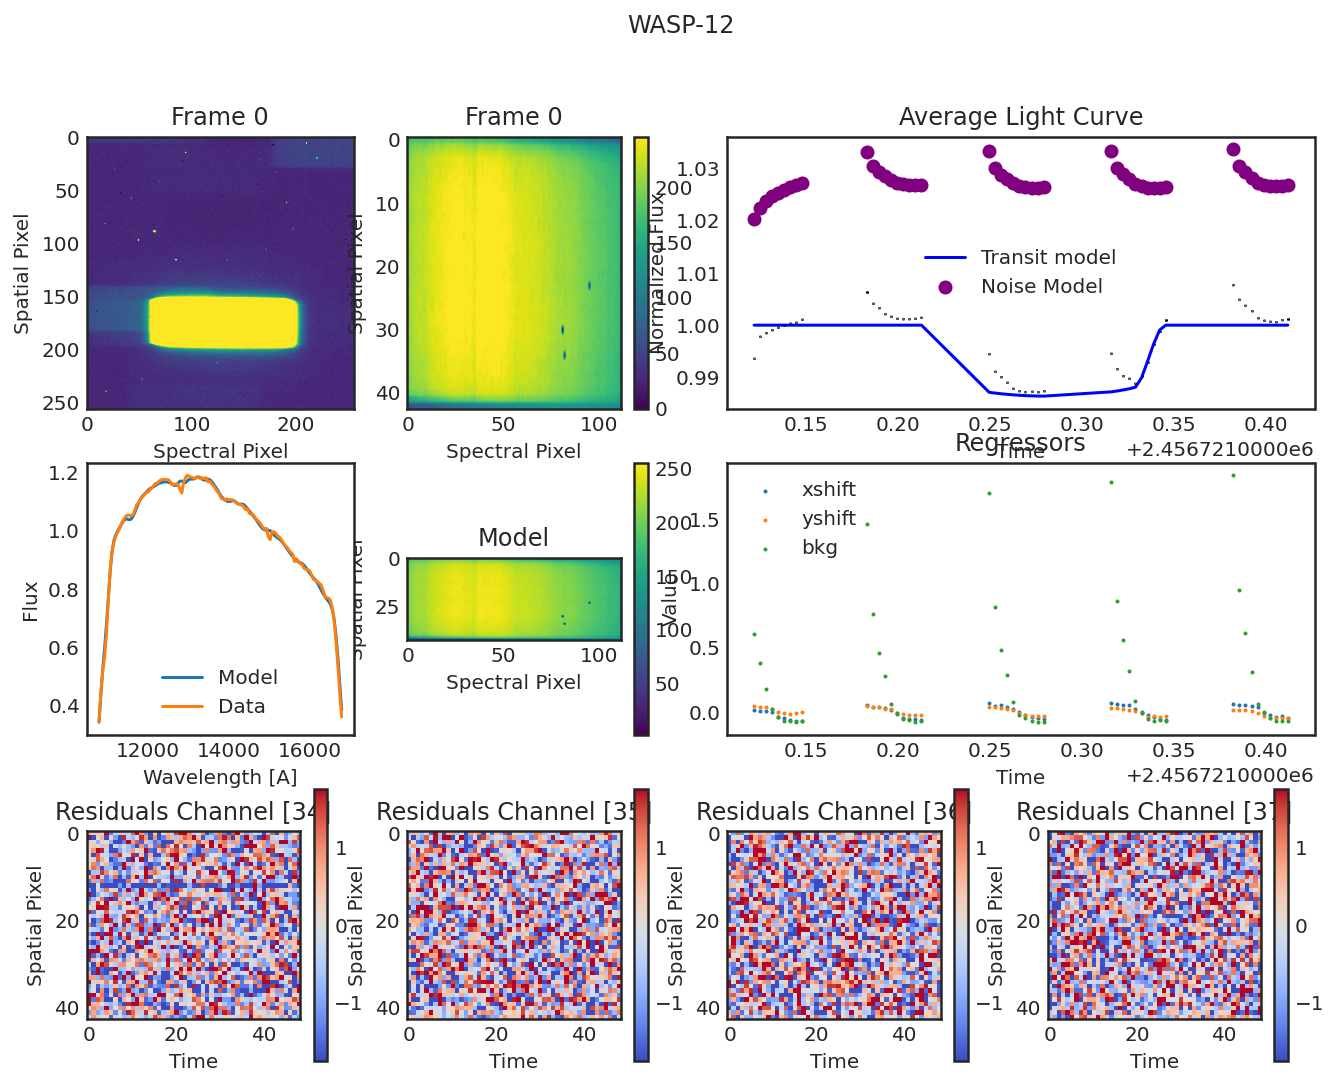

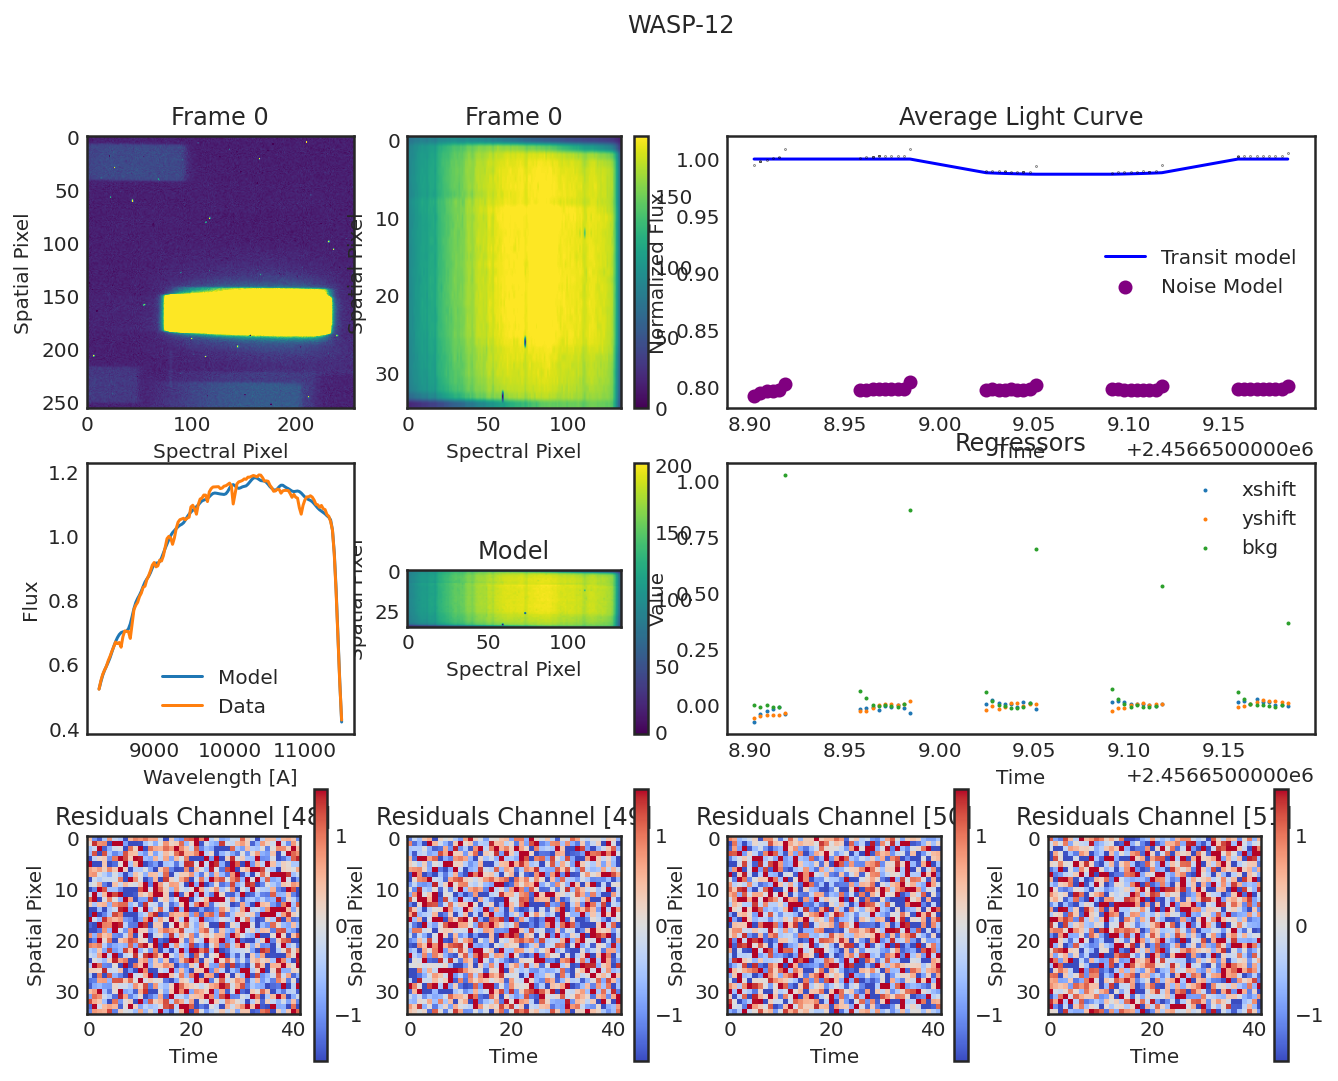

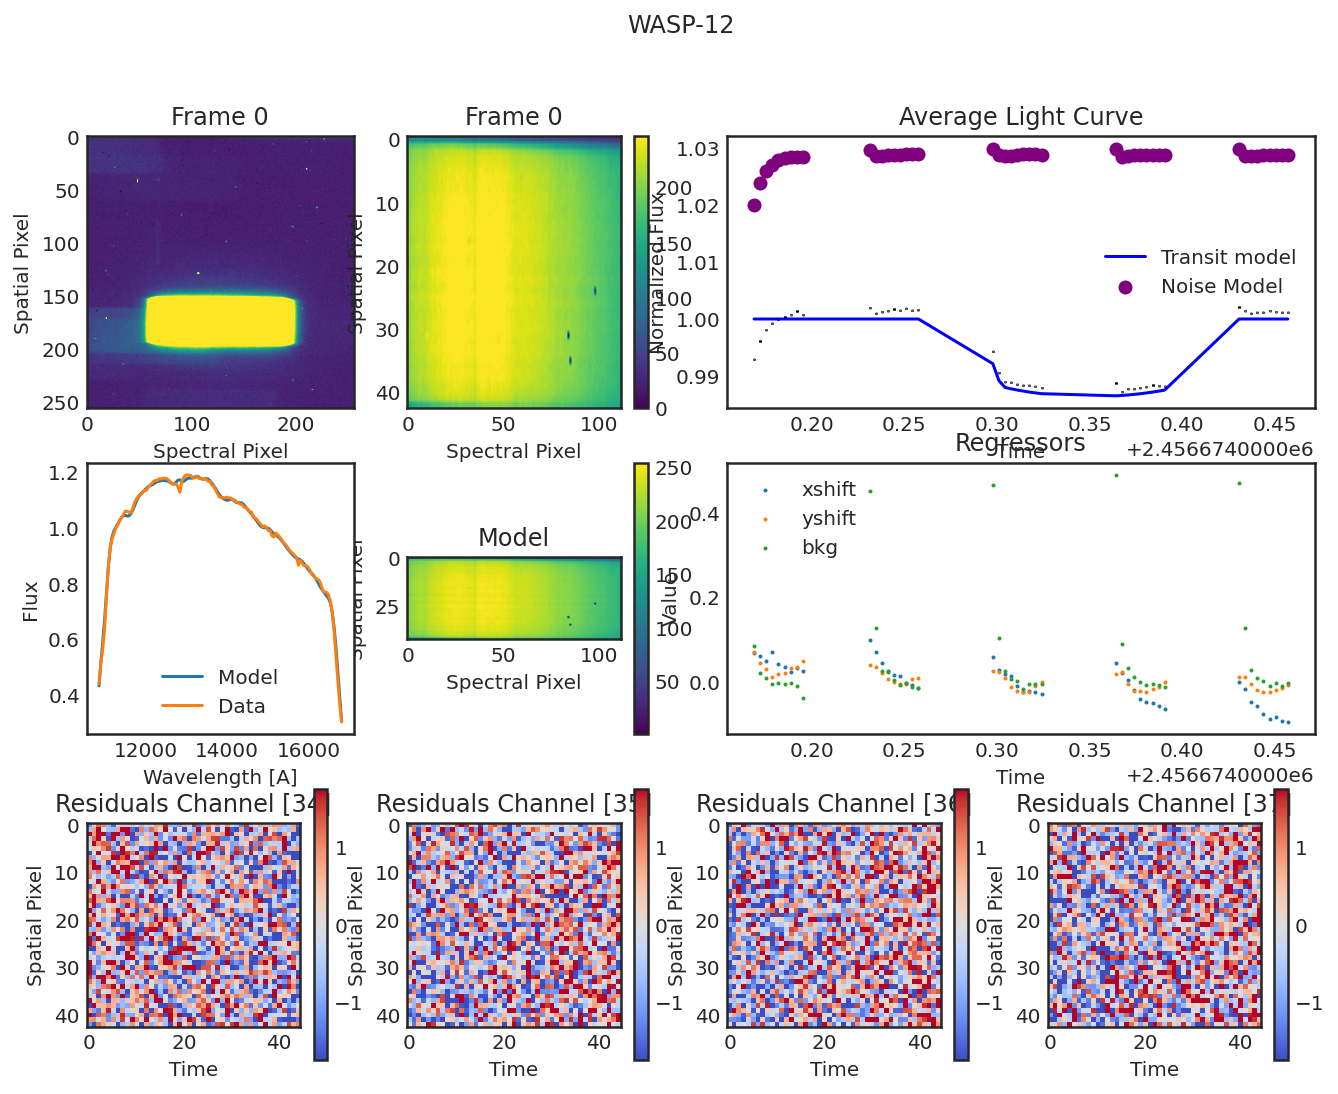

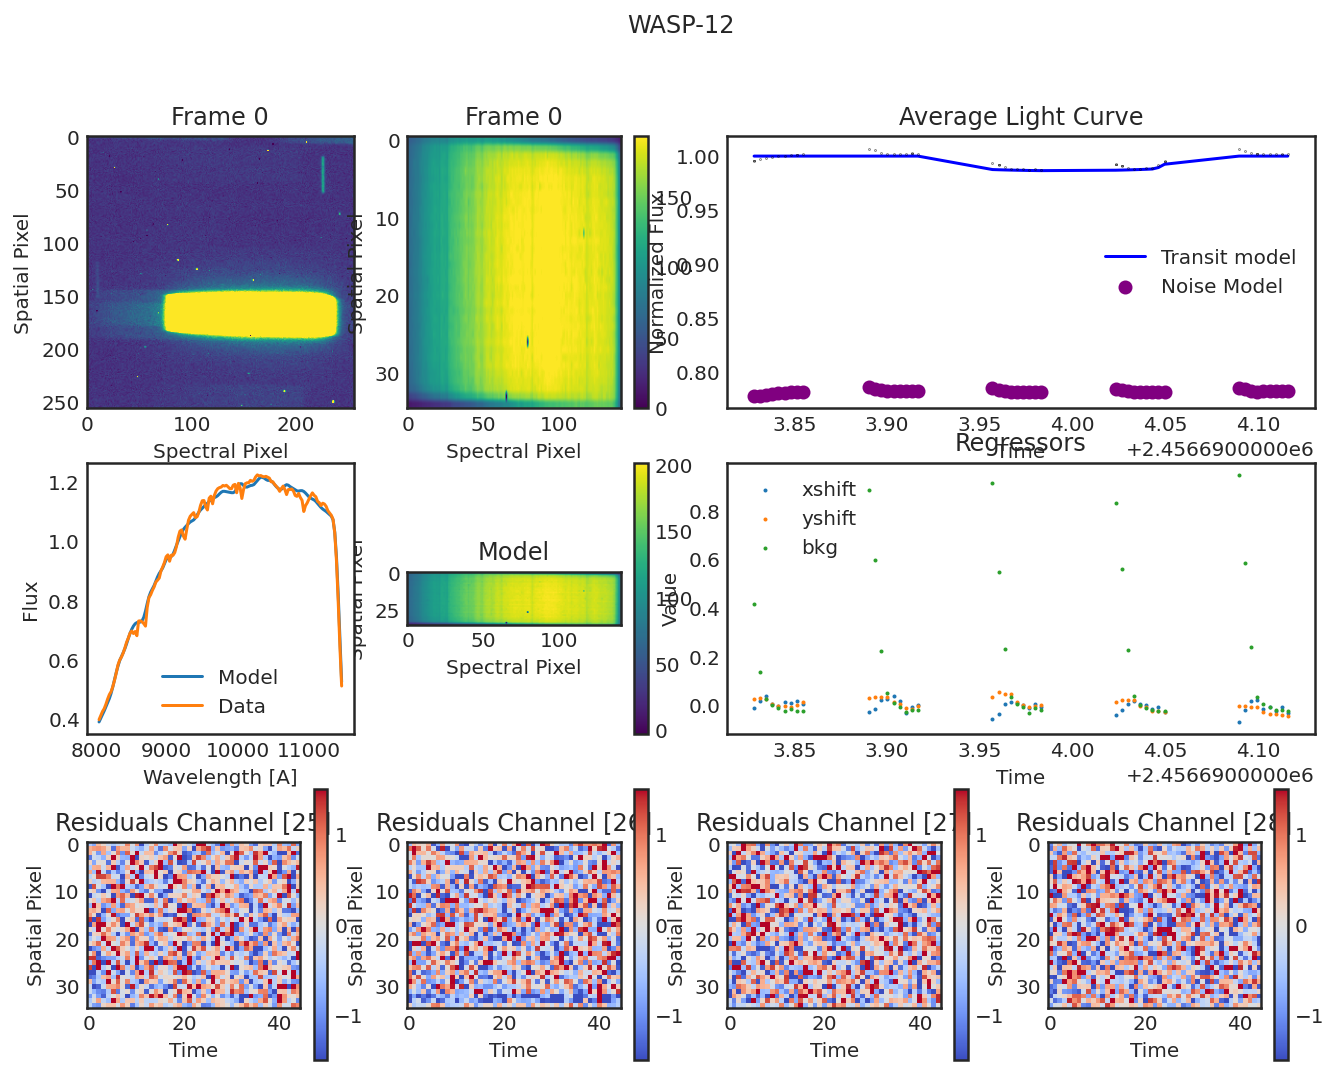

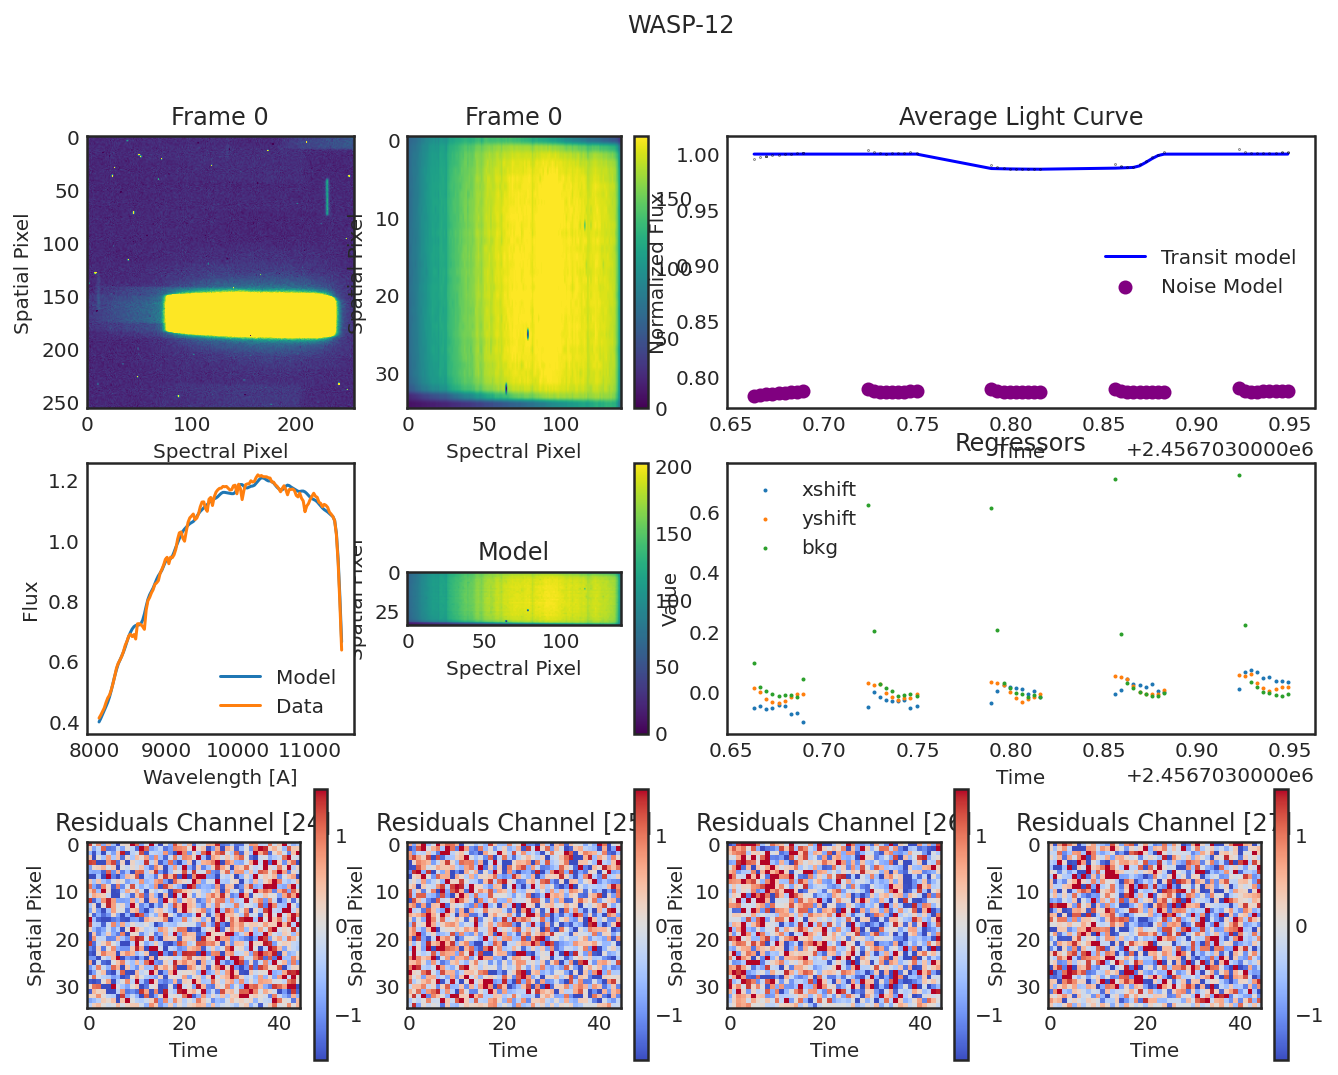

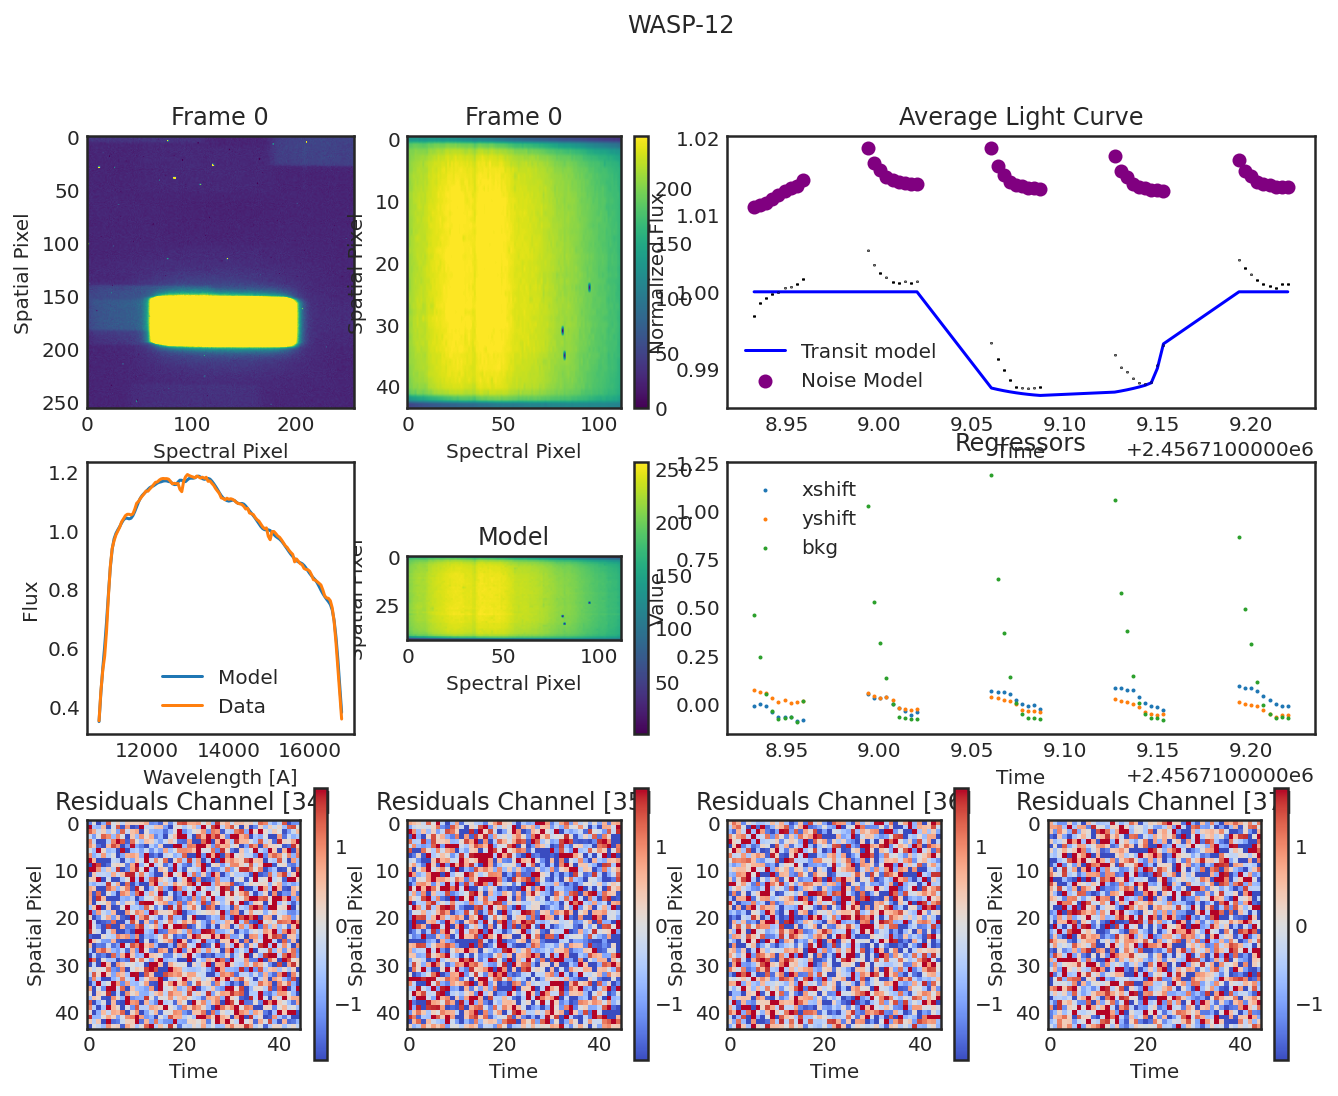

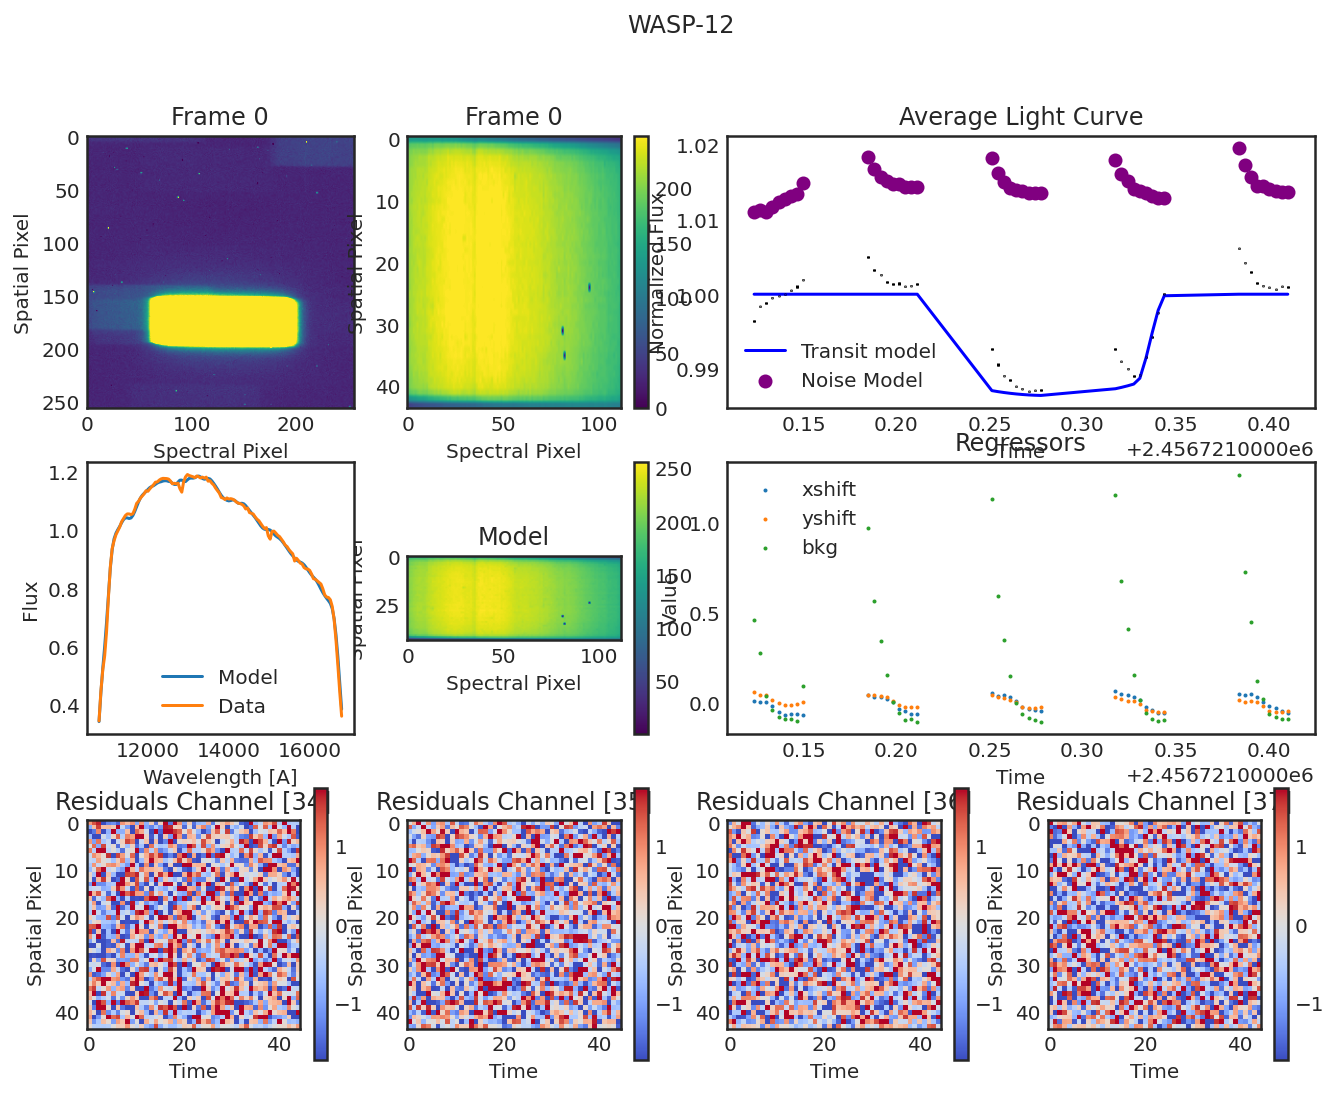

In [10]:
for visit in obs:
    visit.diagnose();
    plt.show();